# 장고를 이용하여 게시판 앱 만들기

## 배포하기

### 환경분리

In [ ]:
# 아나콘다 prompt에서 다음을 실행
# projects 디렉토리에서 github 파일 내려받기
cd config
mkdir settings
move settings.py settings/base.py

In [ ]:
# config/settings/base.py파일에 다음의 내용 추가
BASE_DIR = Path(__file__).resolve().parent.parent.parent

In [ ]:
# config/settings 디렉토리에 환경을 담당할 local.py 파일을 생성한다.
# local.py파일에 다음을 작성한다
from .base import *
ALLOWD_HOSTS = []

In [ ]:
# config/settings 디렉토리에 서버 환경을 담당할 prod.py파일을 생성한다.
# prob.py파일에 다음을 작성한다
from .base import *
# AWS라이트세일에서 발급받았던 고정IP를 작성한다
ALLOWD_HOSTS = ['43.201.80.53']

In [ ]:
# 아나콘다 prompt에서 다음을 실행
# 장고 서버가 있어야 할 설정파일을 지정하는 옵션
python manage.py runserver --settings=config.settings.local

# 서버 설정 파일로 config/settings/local.py를 읽도록 지시
set DJANGO_SETTINGS_MODULE=config.settings.local

python manage.py runserver
git add *
git commit -m "settings change"
git push

In [ ]:
# AWS터미널에서 다음 명령어를 실행
cd ~/projects/bbsnote/
# 변경사항 pull로 당겨오기
git pull

python manage.py runserver --settings=config.settings.prod
cd /home/ubuntu/venvs/
nano bbsnote.sh

* nano bbsnote.sh를 실행하게 되면 환경입력창이 나타나게 될 것이다. 입력창에 아래와 같은 내용을 작성후 저장하고 종료한다.

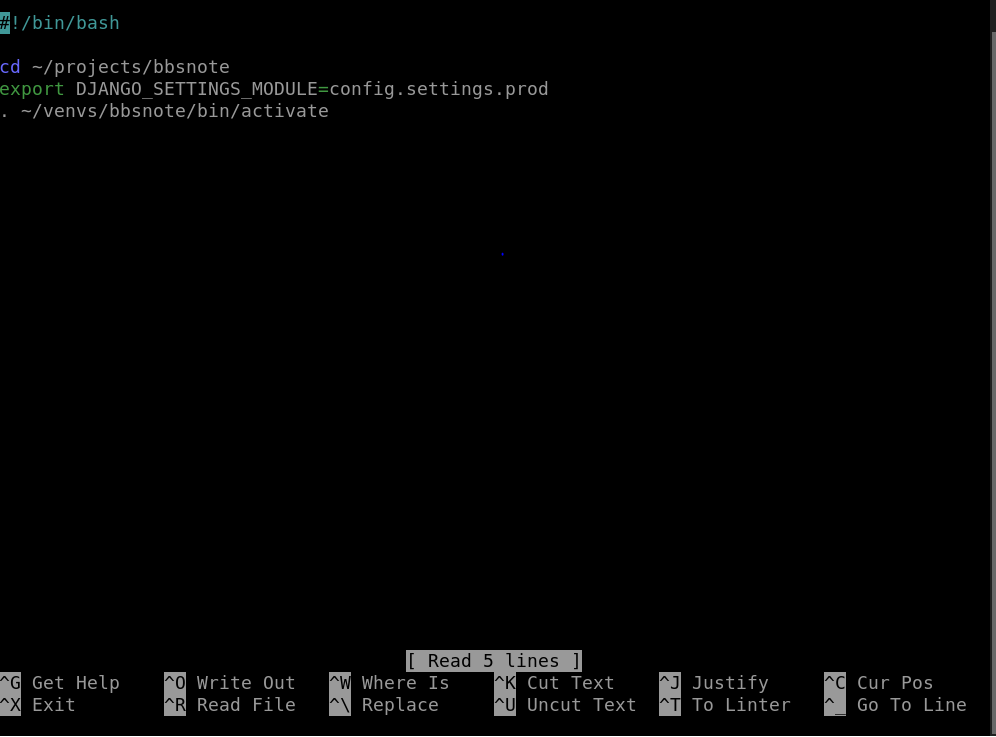

### 작성 절차
1. 내용작성 -> 'ctrl + O'
2. File Name to Write:bbsnote.sh의 이름이 맞는지 확인 -> 엔터키 누르기
3. 환경 입력을 종료하기 위해 'ctrl + x'를 통해 빠져나온다. 이때 변경사항을 저장하겠냐고 물어보면 'y'키를 누르고 종료한다.
4. 명령어 . bbsnote.sh 실행

### WSGI
* 웹 서버와 웹 애플리케이션의 인터페이스를 위한 파이썬 프레임워크

* wsgi서버를 이용하기위해 gunicorn을 설치해준다.

In [ ]:
# AWS터미널에서 다음의 명렬어를 입력
pip install gunicorn

# 8000번으로 WSGI서버 수행, WSGI애플리케이션이 config/wsgi의 application이라는 의미
gunicorn --bind 0:8000 config.wsgi:application
        
# 환경변수 파일 생성
nano /home/ubuntu/venvs/bbsnote.env DJANGO_SETTINGS_MODULE=config.settings.prod

### Gunicorn 설치 및 확인

In [ ]:
# AWS터미널에서 다음의 명령어 실행
# sudo는 관리자 권한으로 실행시킨다는 의미
# bbsnote.service라는 이름의 서비스파일이 생성되어 필요한 내용을 입력해준다.
# 글 작성 후, 저장 절차는 앞선 과정과 동일
sudo nano /etc/systemd/system/bbsnote.service

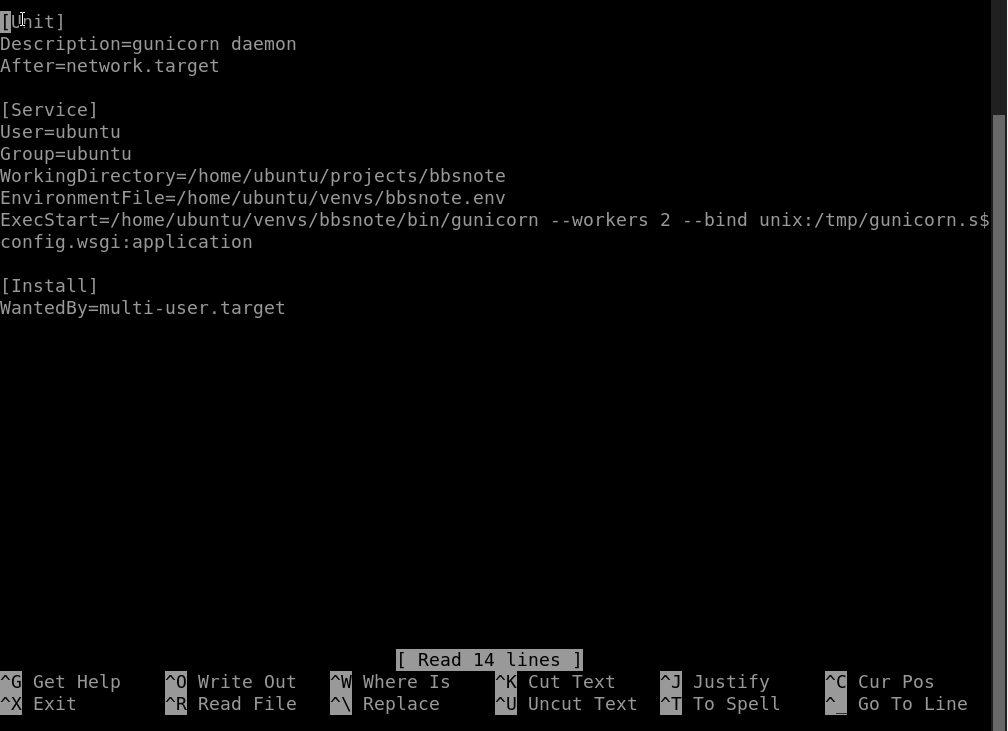

In [ ]:
# 서비스 실행 및 등록
sudo systemctl start bbsnote.service

# 서비스 상태 확인
# status에서 올바르게 진행되지 않고 오류가 발생한다면 앞서 작성한 명령어들을 다시 확인해야 한다
sudo systemctl status bbsnote.service

# 서비스 자동시작 등록
sudo systemctl enable bbsnote.service

* 이 과정 이후, 추가적인 부분을 작성 뒤 서비스를 시작시키고 고정ip를 접속했을때 '502 Bad Gatewqy'관련 오류가 종종 발생할 수도 있다.
* 해결 방법으로, sudo systemctl stop bbsnote.service 명령어를 실행하여 서비스 실행을 중단시키고, start, status, enable의 과정을 다시 실행해준다.

### Nginx 설치 및 확인
* 웹 서버와 연결하기 위해 nginx를 설치해준다.

In [ ]:
# AWS터미널에서 다음의 명령어 실행
sudo apt install nginx

cd /etc/nginx/sites-available/

sudo nano bbsnote

* 마잔가지로 bbsnote라는 이름의 파일이 생성되고, 우리는 필요한 내용을 안에 작성해주고 저장한다.
* server_name항목에는 고정ip를 작성해야 한다.

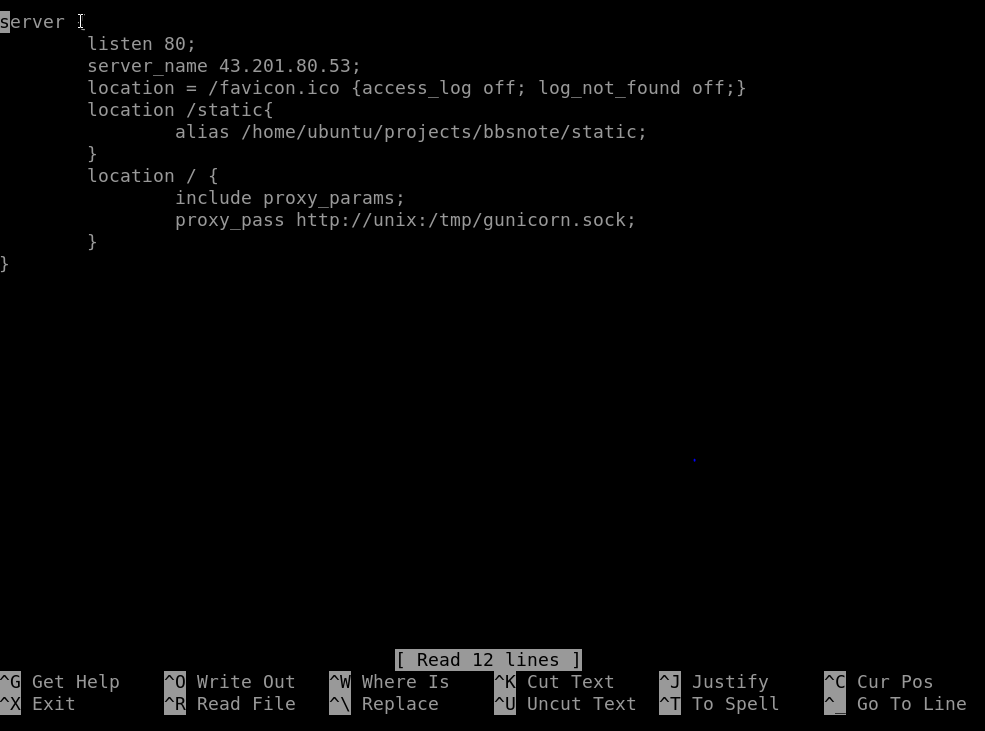

In [ ]:
# AWS터미널
# Nginx가 bbsnote 파일을 환경 파일로 읽을 수 있도록 설정
cd /etc/nginx/sites-enabled/
ls

# 최초 설치이므로 default파일만 존재하게 된다
# 기존 설정파일 삭제
sudo rm default

# bbsnote파일을 접근 가능하도록 설정
sudo ln -s /etc/nginx/sites-available/bbsnote

# Nginx 다시 시작
sudo systemctl restart nginx

# Nginx 상태 확인
sudo nginx -t

### Admin설정

In [ ]:
# AWS 터미널
python manage,py createsuperuser

In [ ]:
# config/settings/prod.py파일에 다음의 내용 추가
from .base import *

ALLOWED_HOSTS = ['43.201.80.53']
STATIC_ROOT = BASE_DIR / 'static/'
STATICFILES_DIRS = []

In [ ]:
# conda prompt에서 커밋 추가
git commit -a -m "STATIC_ROOT 생성"
git push

In [ ]:
# AWS터미널
git pull

In [ ]:
# 프로그램이 변경되었으므로 gunicorn 재시작을 해준다
sudo systemctl restart bbsnote.service

# 관리자 앱 정적파일을 복사해준다
python manage.py collectstatic
# 'yes'를 입력 후 계속 진행

* 이제 앱 서비스를 실행하게되면 터미널에서 별도의 runserver명령 없이도 잘 실행되는 것을 알 수 있다.

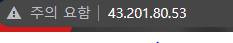

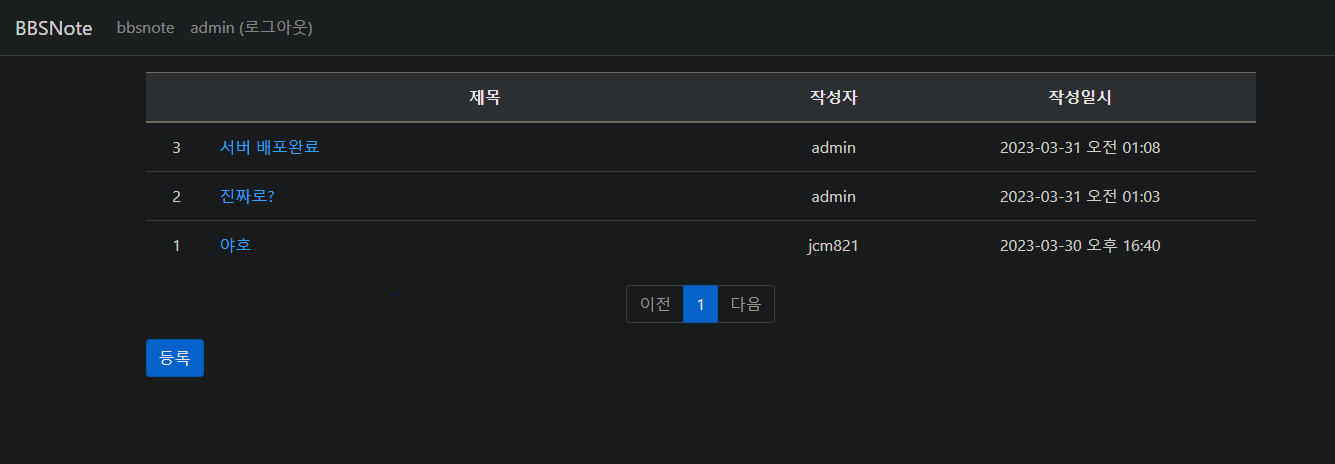

* admin페이지 역시 잘 나타난다.

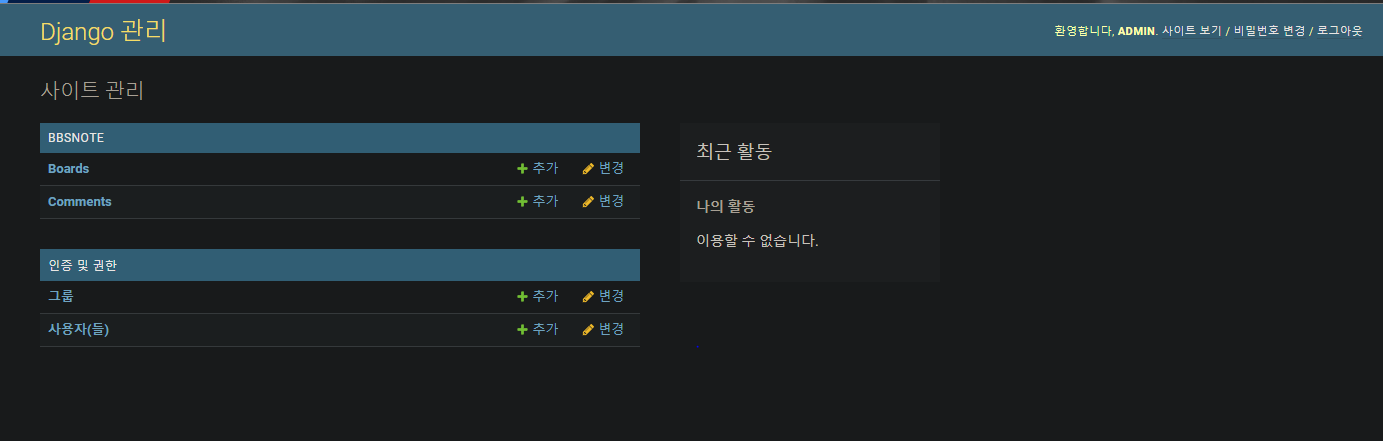

# python pandas 복습

# 외국인 출입국 통계 데이터로 데이터 전처리 및 시각화 연습

In [1]:
# 필요한 패키지 불러오기
import pandas as pd

In [ ]:
# 필요 패키지 설치
!pip install openpyxl

In [2]:
# 데이터 불러오기
excelFile = 'C:/Users/chunc/Desktop/취업캠프/python/python/풀스텍/files/kto_201901.xlsx'
# skipfooter옵션은 엑셀파일 하단에 존재하는 footer총계값을 제외시켜주는 옵션이다
kto_201901 = pd.read_excel(excelFile, header = 1, usecols = 'A:G', skipfooter = 4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [3]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


## 데이터 전처리

In [4]:
# 데이터의 컬럼별 특징
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [5]:
# 정수형 변수의 특징
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [6]:
# 관광, 상용, 공용, 유학연수의 최소값이 0인 데이터의 경우
condition = (kto_201901['관광'] == 0) | (kto_201901['상용'] == 0) | (kto_201901['공용'] == 0) \
| (kto_201901['유학/연수'] == 0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [7]:
# 기준년월 컬럼 추가
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [8]:
# 국적 데이터 남기기/ 중복제거를 한 값을 보여준다
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [9]:
# 대륙목록 생성
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [10]:
# kto_201901 데이터의 국적 컬럼에서 continents_list에 포함되지 않는 국가만 선택
# 대륙정보는 False로 변경하여 제외시키고 국가들만 출력
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [11]:
# 데이터 확인
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [12]:
kto_201901_country.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
59,대양주 기타,555,3,4,0,52,614,2019-01
61,남아프리카공화국,368,9,1,6,616,1000,2019-01
62,아프리카 기타,768,718,90,206,908,2690,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
66,교포,0,0,0,0,15526,15526,2019-01


In [14]:
# 인덱스 재설정 - 데이터 필터링 시 인덱스 누락이 발생, 인덱스 초기화를 진행한다
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [15]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
55,대양주 기타,555,3,4,0,52,614,2019-01
56,남아프리카공화국,368,9,1,6,616,1000,2019-01
57,아프리카 기타,768,718,90,206,908,2690,2019-01
58,국적미상,33,4,0,1,16,54,2019-01
59,교포,0,0,0,0,15526,15526,2019-01


In [16]:
# 각 국가들이 어떤 대륙에 속하는지에 대한 정보를 추가하기 위해
# 대륙칼럼 추가 전 국가별 매칭되는 대륙 확인
# 대륙 칼럼에 넣을 리스트 생성
# row로 되어있는 데이터를 column으로 변경
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 \
+ ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [17]:
# 대륙 칼럼 생성
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아


In [18]:
kto_201901_country_newindex.tail(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
50,불가리아,154,1,1,10,265,431,2019-01,유럽
51,폴란드,713,10,0,27,574,1324,2019-01,유럽
52,구주 기타,1809,44,25,91,996,2965,2019-01,유럽
53,오스트레일리아,12795,93,17,34,1346,14285,2019-01,오세아니아
54,뉴질랜드,2029,20,17,5,654,2725,2019-01,오세아니아
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


### 국적별 관광객 비율

In [19]:
# 관광객 비율 컬럼 생성
kto_201901_country_newindex['관광객비율(%)'] = \
round((kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계']) * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3


In [20]:
# 관광객컬럼비율 컬럼으로 내림차순 정렬
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [21]:
# 관광객컬럼비율 컬럼으로 오름차순 정렬
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [22]:
# 전체비율 출력하기
tourist_sum = sum(kto_201901['관광'])
kto_201901_country_newindex['전체비율(%)'] = \
round((kto_201901_country_newindex['관광'] / tourist_sum) * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,11.2
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,2.0
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.1
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,1.9


In [23]:
# 전체비율 컬럼으로 오름차순 정렬
kto_201901_country_newindex.sort_values(by = '전체비율(%)', ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,18.1
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,11.2
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,4.9
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,2.4
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,2.0


In [24]:
# 대륙별 관광객비율의 평균
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)', index = '대륙', aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [25]:
# 전체 과정을 함수화 하기
def create_kto_data(yy, mm):
    # 불러올 excel파일 경로 지정
    file_path = 'C:/Users/chunc/Desktop/취업캠프/python/python/풀스텍/files/kto_{}{}.xlsx'.format(yy, mm)
    
    # excel파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:G')
    
    # '기준년월' 컬럼 추가하기
    df['기준년월'] = '{}={}'.format(yy, mm)
    
    # '국적' 컬럼에서 대륙 제거하고 국가만 남기기
    # 제거할 대륙명 선정
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    
    # 대륙 미포함 조건
    condition = (df['국적'].isin(ignore_list) == False)
    df_country = df[condition].reset_index(drop = True)
    
    # '대륙' 컬럼 추가하기
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 \
    + ['기타대륙'] + ['교포']
    
    # 대륙 컬럼 생성을 위한 목록 만들어 놓기
    df_country['대륙'] = continents
    
    # 국가별 '관광객비율(%)' 컬럼 추가하기
    df_country['관광객비율(%)'] = round((df_country.관광 / df_country.계) * 100, 1)
    
    # '전체비율(%)' 컬럼 추가하기
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round((df_country['관광'] / tourist_sum) * 100, 1) 
    
    # 결과 출력하기
    return(df_country)

In [26]:
# 함수를 통해 데이터 출력해보기
create_kto_data(2019,'01').head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019=01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019=01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019=01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019=01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019=01,아시아,82.3,3.8


In [27]:
create_kto_data(2019,'01').tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
55,대양주 기타,555,3,4,0,52,614,2019=01,오세아니아,90.4,0.1
56,남아프리카공화국,368,9,1,6,616,1000,2019=01,아프리카,36.8,0.0
57,아프리카 기타,768,718,90,206,908,2690,2019=01,아프리카,28.6,0.1
58,국적미상,33,4,0,1,16,54,2019=01,기타대륙,61.1,0.0
59,교포,0,0,0,0,15526,15526,2019=01,교포,0.0,0.0


In [28]:
kto_test = create_kto_data(2018, 12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018=12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018=12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018=12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018=12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018=12,아시아,87.4,4.2


In [29]:
# 엑셀 파일 통합
# 년도와 월 변환해주기
for yy in range(2010, 2021):
    for mm in range(1, 13):
        # zfill함수를 이용, 0을 포함한 두 자리로 출력
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [30]:
# 통합 데이터 생성하기
df = pd.DataFrame()

# 패턴 분석결과를 이중 반복문을 통해 구현
for yy in range(2010, 2021):
    for mm in range(1, 13):
        # try이하 구문 실행
        try:
            # 앞서 만든 create_kto_data 함수로 excel데이터를 temp에 불러오기
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            # temp로 불러온 데이터를 df 밑으로 추가하기
            df = df.append(temp, ignore_index = True)
        # 만약 try구문에서 에러가 발생하면 except이후를 실행
        except:
            pass
df.info()

C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppDa

C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppDa

C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppDa

C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppDa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7920 non-null   object 
 1   관광        7920 non-null   int64  
 2   상용        7920 non-null   int64  
 3   공용        7920 non-null   int64  
 4   유학/연수     7920 non-null   int64  
 5   기타        7920 non-null   int64  
 6   계         7920 non-null   int64  
 7   기준년월      7920 non-null   object 
 8   대륙        7920 non-null   object 
 9   관광객비율(%)  7919 non-null   float64
 10  전체비율(%)   7920 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 680.8+ KB


C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_41396\2711907284.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp, ignore_index = True)


In [31]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010=01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010=01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010=01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010=01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010=01,아시아,75.1,3.3


In [32]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7915,대양주 기타,2,0,0,0,30,32,2020=12,오세아니아,6.2,0.0
7916,남아프리카공화국,14,4,3,0,77,98,2020=12,아프리카,14.3,0.1
7917,아프리카 기타,22,102,13,27,554,718,2020=12,아프리카,3.1,0.2
7918,국적미상,0,0,0,0,0,0,2020=12,기타대륙,NaN,0.0
7919,교포,0,0,0,0,915,915,2020=12,교포,0.0,0.0


In [42]:
# excel파일로 저장
df.to_excel('C:/Users/chunc/Desktop/취업캠프/python/python/풀스텍/files/kto_total_20230331.xlsx', index = False)

## 데이터 시각화

In [43]:
# 패키지 불러오기
import matplotlib.pyplot as plt

In [44]:
# 국적이 중국인 데이터를 필터링
condition = (df['국적'].isin(['중국']) == True)
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010=01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010=02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010=03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010=04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010=05,아시아,57.8,17.0


### 시계열 그래프

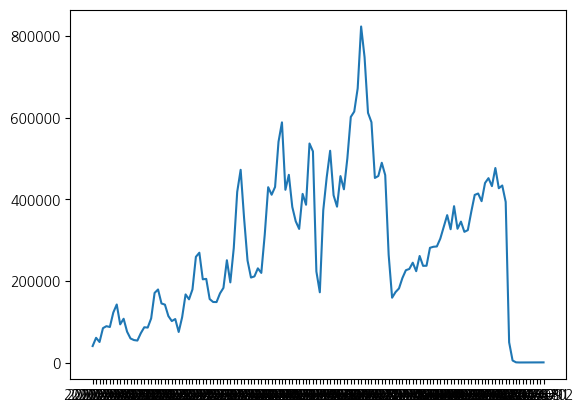

In [45]:
# 시계열 그래프
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

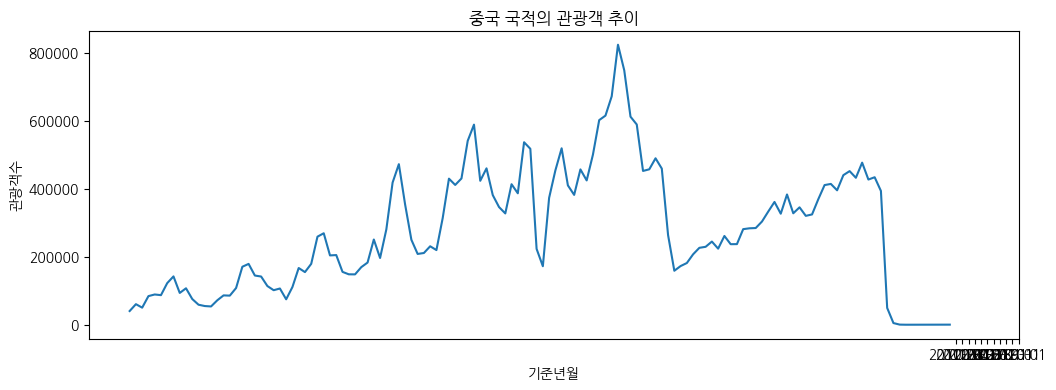

In [46]:
# 세부 사항 조절해보기
# 그래프 크기 설정
plt.figure(figsize = (12, 4))

# 그래프의 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

# 그래프 제목, x축, y축의 이름
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
plt.show()

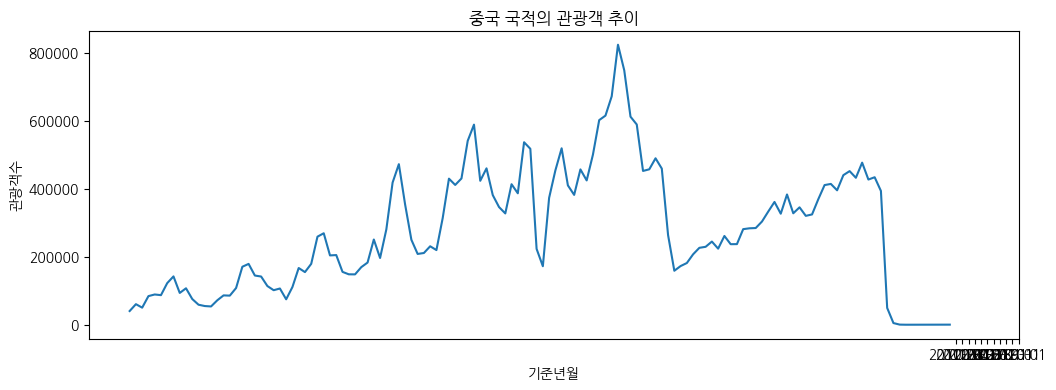

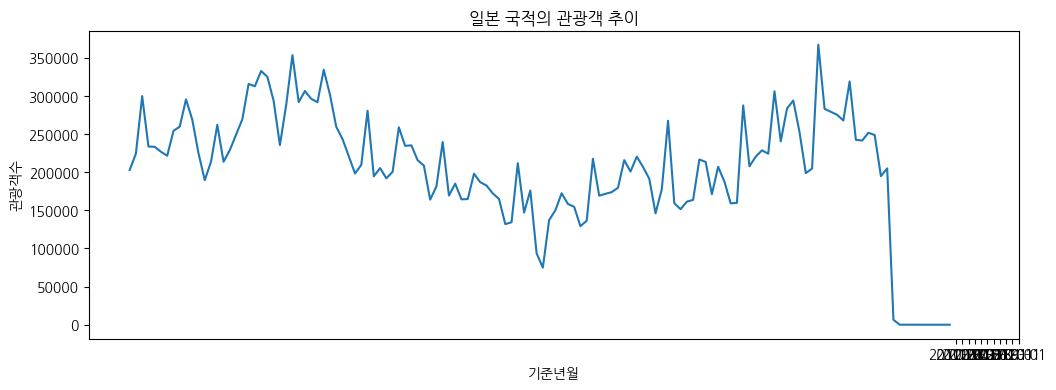

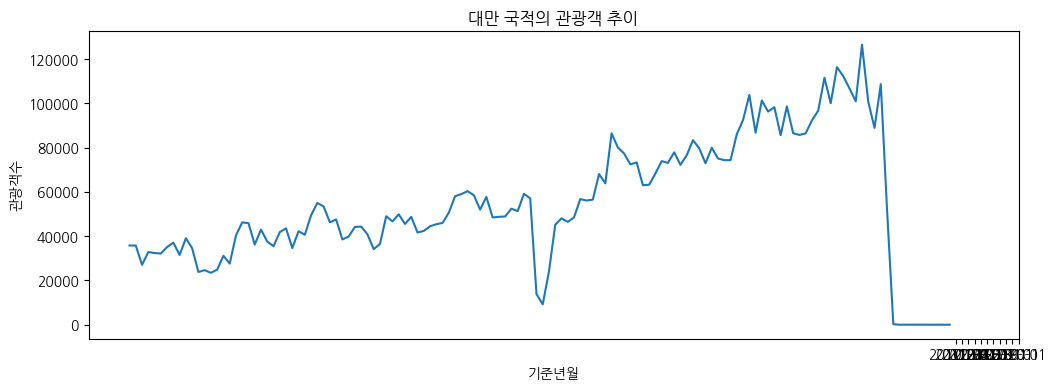

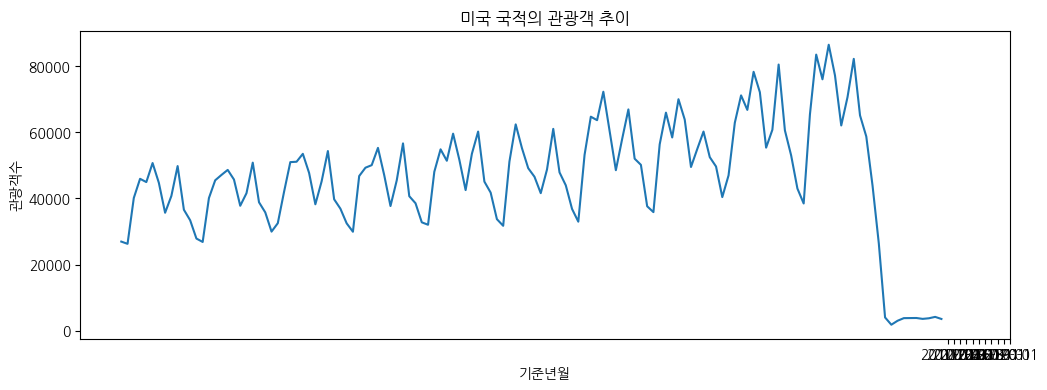

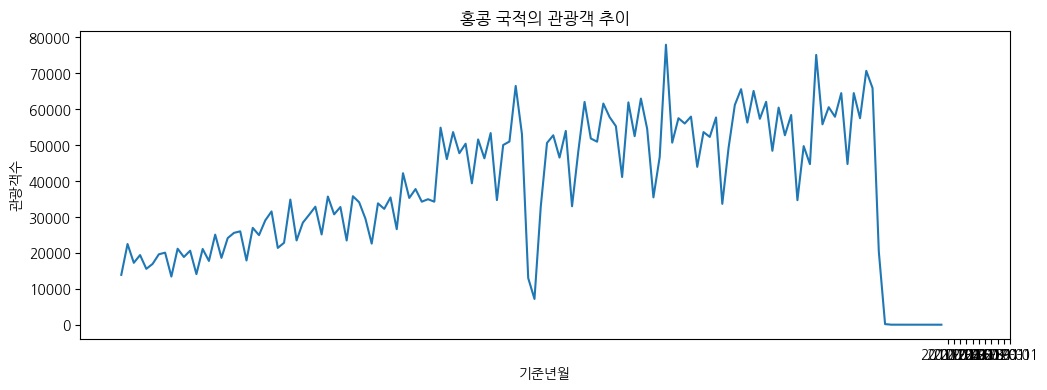

In [47]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국기 리스트 생성
# 앞서 데이터 전처리 과정에서 전체비율을 기준으로 내림차순 했던 결과 이용
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

# 반복문 이용
for cntry in cntry_list:
    # 국적 관광객만 추출하기
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    # 그래프 크기 설정
    plt.figure(figsize = (12, 4))
    
    # 그래프의 내용 설정
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    # 그래프 제목, x축, y축의 이름 달기
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    # x축 눈금값 설정
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
    plt.show()

### 히트맵
* 매트릭스(matrix) 형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법
* 전체 데이터를 한눈에 파악할 수 있다.

In [48]:
# 데이터 확인
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010=01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010=01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010=01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010=01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010=01,아시아,75.1,3.3


In [49]:
df['년도'] = df['기준년월'].str.slice(0, 4)
df['월'] = df['기준년월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010=01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010=01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010=01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010=01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010=01,아시아,75.1,3.3,2010,01


In [50]:
# 중국인 관광객 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010=01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010=02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010=03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010=04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010=05,아시아,57.8,17.0,2010,05


In [51]:
# df_filter데이터를 매트릭스 형태로 반환
df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425,60590,50330,84252,89056,87080,122432,142180,93545,107237,75686,58987
2011,55070,53863,72003,86397,85668,108060,170524,178937,144704,141824,113856,101605
2012,106606,74895,110965,166843,154841,179074,258907,268988,203857,204866,155503,148320
2013,148118,169395,182850,250549,196306,280319,417991,472005,353359,249850,208175,210950
2014,230706,219533,313400,429419,410971,429991,540683,588181,423133,459708,381118,345957
2015,327225,413096,386386,536428,517154,223101,172075,372990,453670,518651,409635,381722
2016,456636,424232,500018,601460,614636,671493,823016,747818,611538,588561,452082,456882
2017,489256,458952,263788,158784,172527,181507,207099,226153,229172,244541,223743,260983
2018,236825,237075,281020,283533,284317,303405,332657,360982,326438,382922,327664,345135


* 히트맵 그래프를 그리기 위해서는 seaborn라이브러리도 함께 호출해야 함
* seaborn 라이브러리는 matplotlib 라이브러리에 종속되기 때문이다.

In [52]:
# seaborn 라이브러리 호출
import seaborn as sns

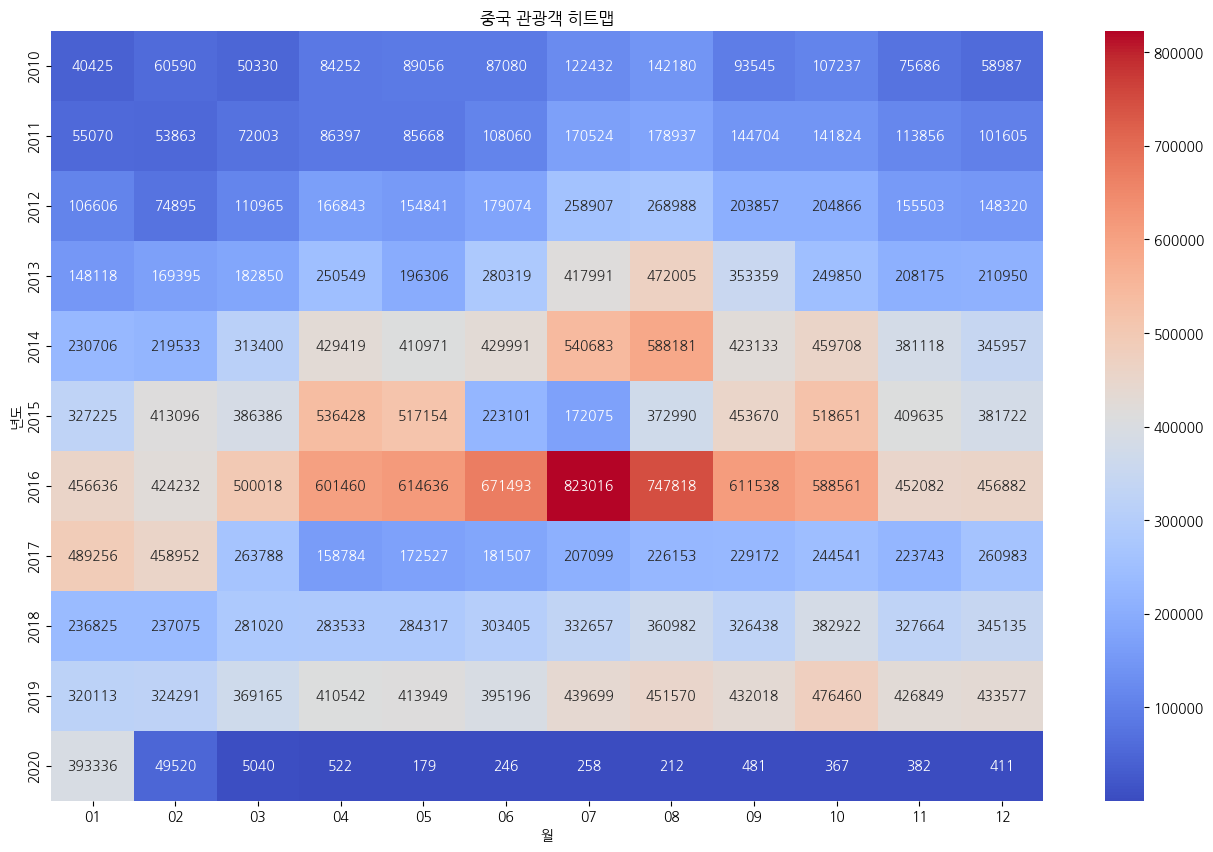

In [53]:
# 그래프 크기 설정
plt.figure(figsize = (16, 10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'coolwarm')

# 그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

# 그래프 표현
plt.show()

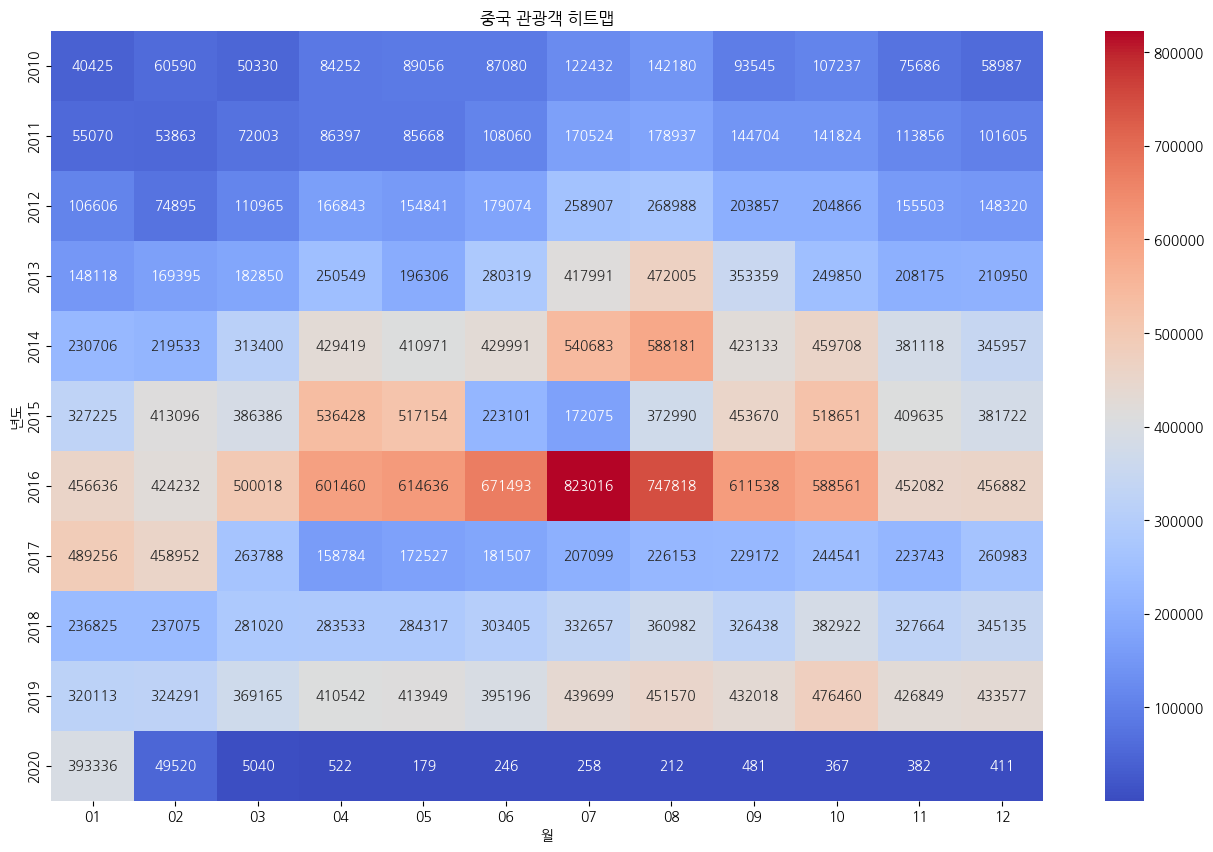

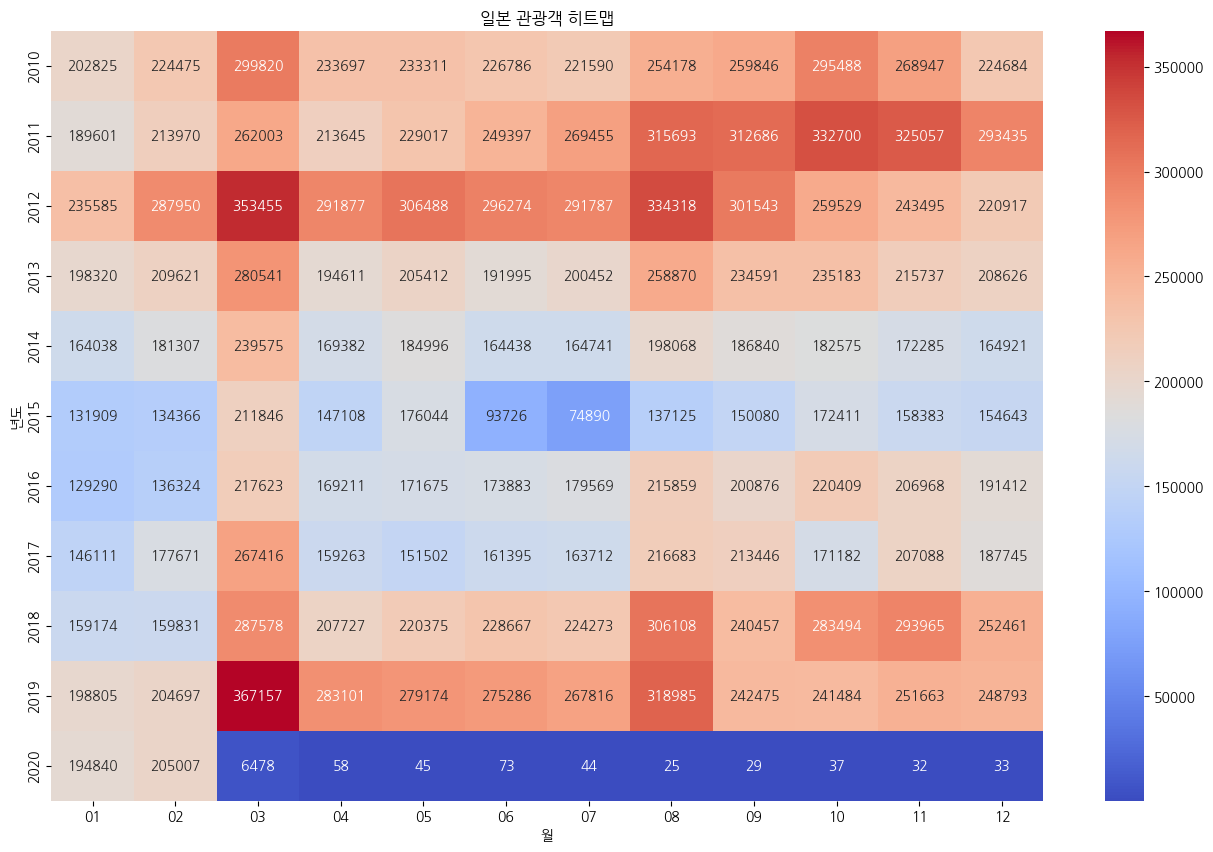

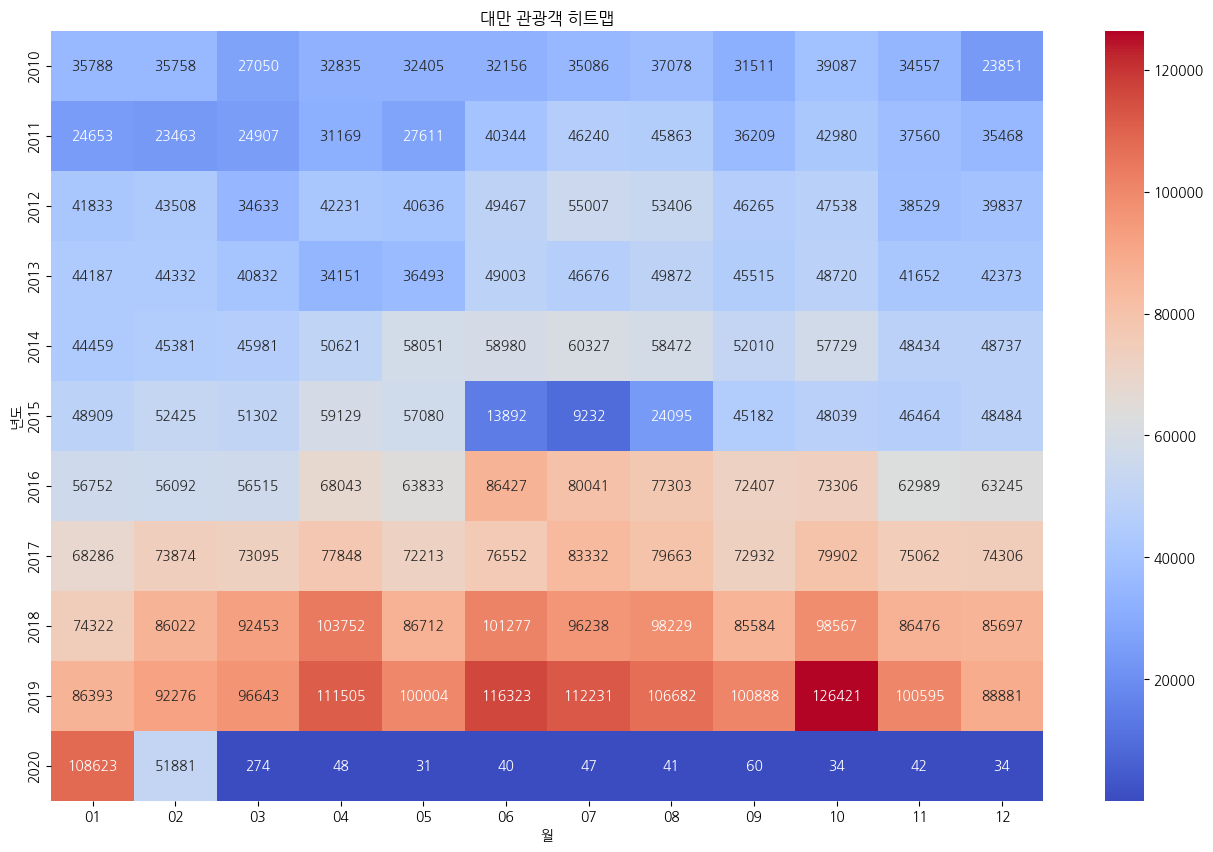

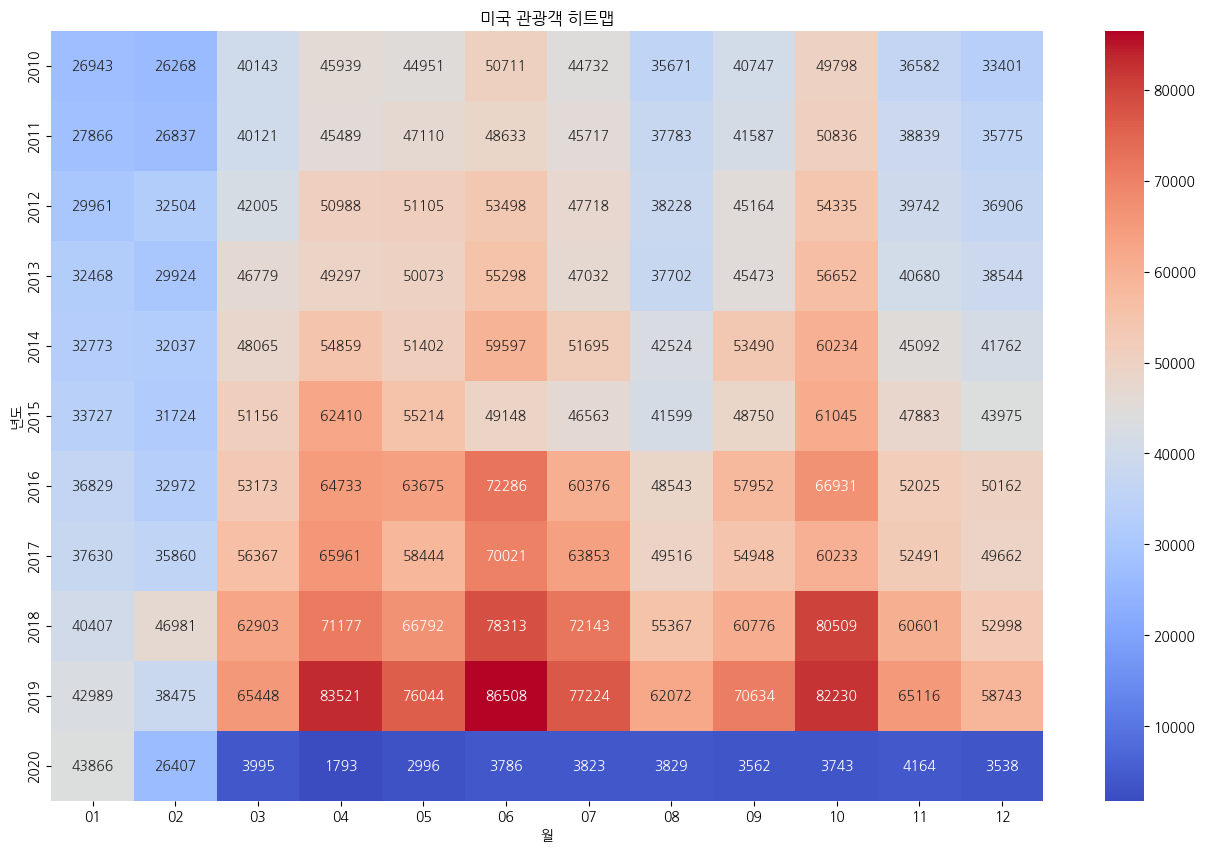

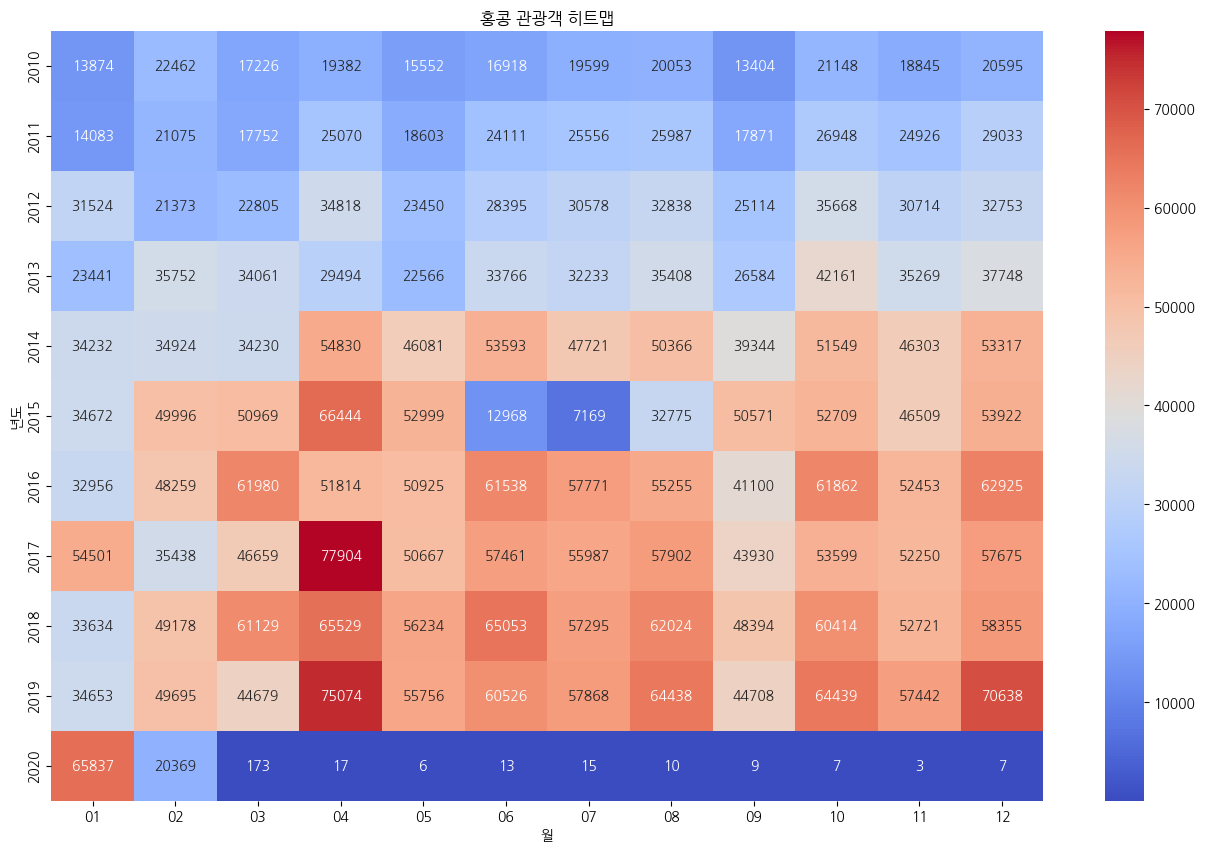

In [54]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국기 리스트 생성
# 앞서 데이터 전처리 과정에서 전체비율을 기준으로 내림차순 했던 결과 이용
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

for cntry in cntry_list:
    # 국적 관광객만 추출하기
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns = '월')
    
    # 그래프 크기 설정
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'coolwarm')

    # 그래프 타이틀 달기
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현
    plt.show()